# Aprendizaje no supervisado - ALGORITMO DE CLUSTERING K-MEANS (K-MEDIAS)

Carga de librerías y adecuación de ploteado de gráficos

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; 
sns.set_theme()  # for plot styling
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Generando datos sintéticos

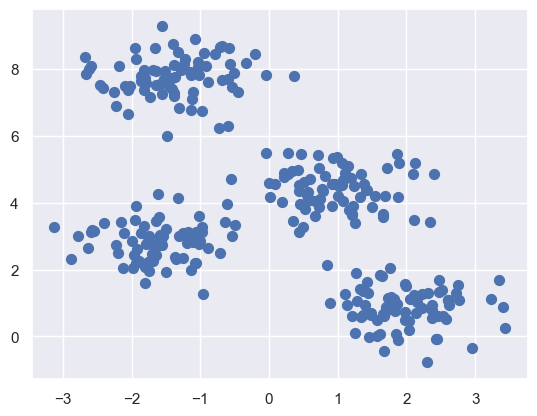

In [48]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Aplicación del método del codo para calcular **K**

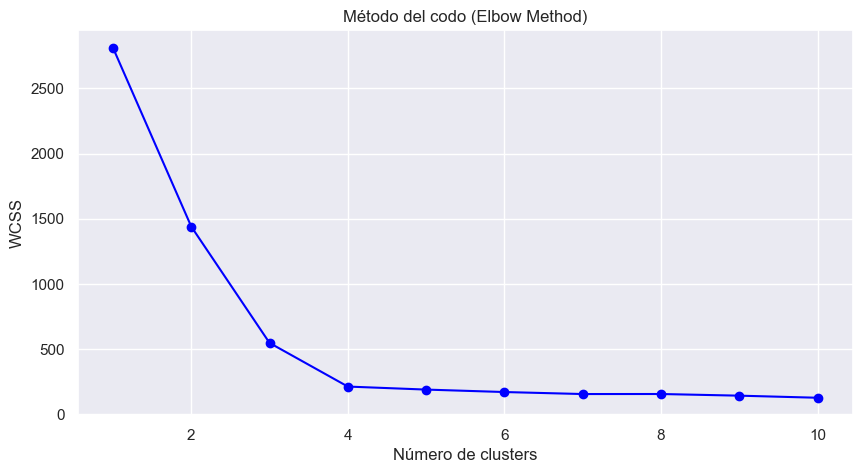

In [49]:
wcss = [] # vector para guardar la suma de los cuadrados de las distancias.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # k-means++ es un algoritmo para inicializar los centroides.random_state es la semilla para el generador de números aleatorios
    kmeans.fit(X)                               # Entrenamos el modelo con las dos últimas columnas del dataset
    wcss.append(kmeans.inertia_)      # Añadimos el valor de inertia_ , que es el atributo que nos da la suma de los cuadrados de las distancias de cada punto al centroide más cercano.

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', color='blue') 
plt.title('Método del codo (Elbow Method)')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #within cluster sum of squares - Suma de cuadrados dentro del cluster
plt.show()

Ubicación de los 11 centroides analizados

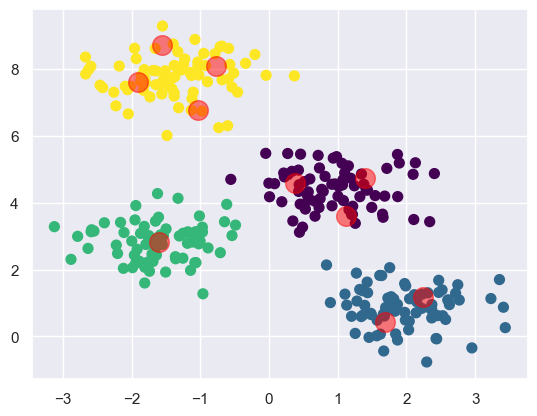

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Construcción y ejecución del modelo final (K=4)

In [51]:

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### Ploteado y ubicación de centroides

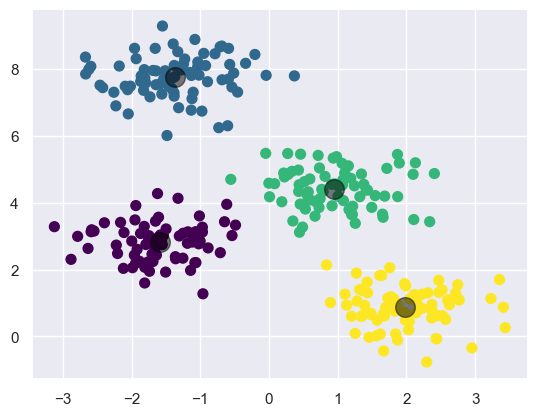

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## K-Means sobre el dataset IRIS

Importamos librerías

In [53]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

Cargamos dataset

In [54]:
iris = datasets.load_iris()

Particionado de datos (variables de entrada y variable de salida)  
Quitamos la variable de salida ('Target') donde se halla la especie etiquetada para poder realizar el clustering

In [55]:
X_iris = iris.data
Y_iris = iris.target

In [56]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Localización de **K** aplicando el método del codo

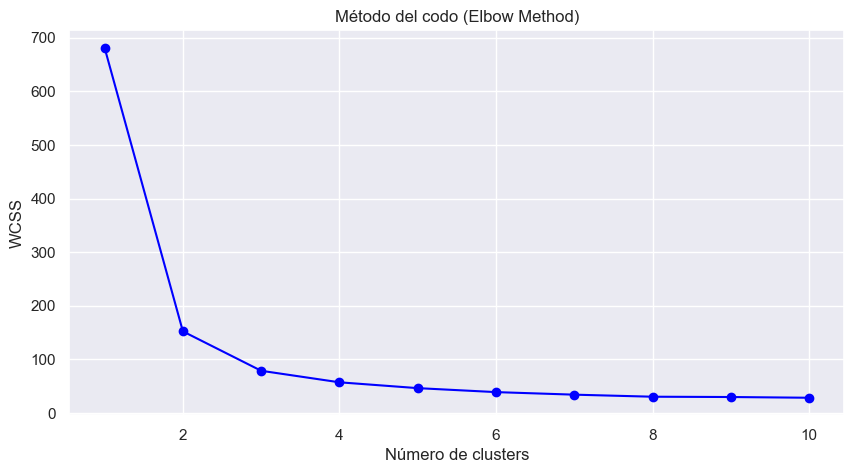

In [57]:
wcss = [] # vector para guardar la suma de los cuadrados de las distancias.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # k-means++ es un algoritmo para inicializar los centroides.random_state es la semilla para el generador de números aleatorios
    kmeans.fit(x)                               # Entrenamos el modelo con las dos últimas columnas del dataset
    wcss.append(kmeans.inertia_)      # Añadimos el valor de inertia_ , que es el atributo que nos da la suma de los cuadrados de las distancias de cada punto al centroide más cercano.

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', color='blue') 
plt.title('Método del codo (Elbow Method)')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #within cluster sum of squares - Suma de cuadrados dentro del cluster
plt.show()

Ploteado de los 11 posibles centroides

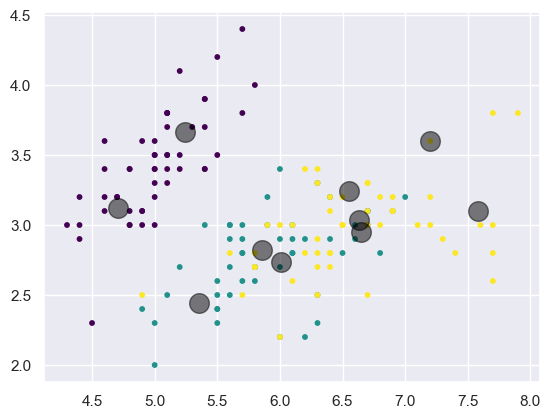

In [58]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=y['Target'], s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Predicciones usando el PÉTALO

Text(0, 0.5, 'Anchura del pétalo')

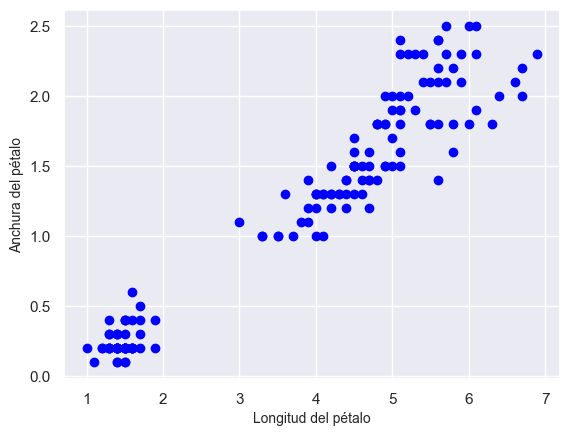

In [59]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Longitud del pétalo', fontsize = 10)
plt.ylabel('Anchura del pétalo', fontsize = 10)

In [60]:
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

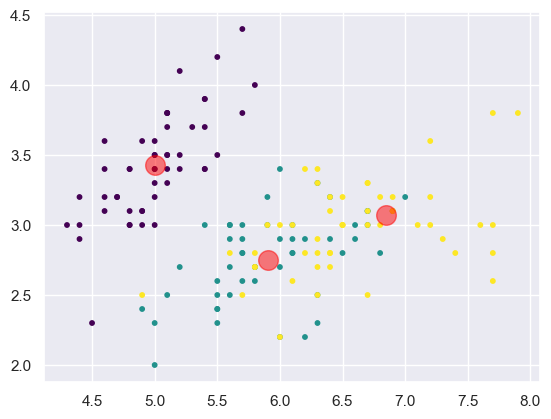

In [61]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=y['Target'], s=10, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [62]:
y_kmeans = model.predict(x)
print('Predicciones', y_kmeans)

Predicciones [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [63]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans) #Y_iris contiene la columna 'Target' con las etiquetas de las especies
print(accuracy)

0.7302382722834697


Text(0, 0.5, 'Anchura del pétalo')

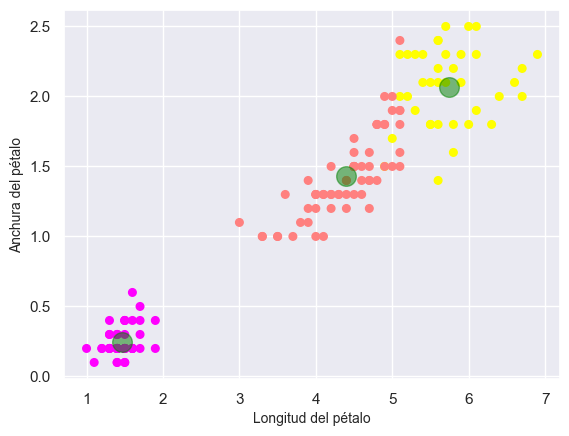

In [64]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = y_kmeans, s = 30, cmap = 'spring')
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='green', s=200, alpha=0.5)
plt.xlabel('Longitud del pétalo', fontsize = 10)
plt.ylabel('Anchura del pétalo', fontsize = 10)

### Predicciones usando el SÉPALO

Text(0, 0.5, 'Anchura del sépalo')

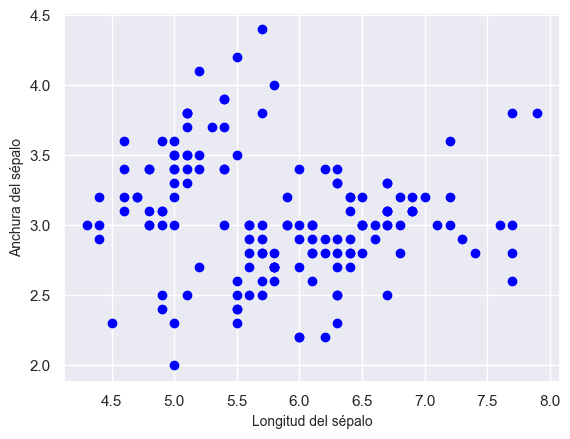

In [65]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = 'blue')
plt.xlabel('Longitud del sépalo', fontsize = 10)
plt.ylabel('Anchura del sépalo', fontsize = 10)

In [66]:
model_1 = KMeans(n_clusters = 3, max_iter = 1000)
model_1.fit(x)
y_labels = model_1.labels_

In [67]:
y_kmeans_1 = model_1.predict(x)
print('Predicciones', y_kmeans_1)

Predicciones [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [68]:
accuracy_1 = metrics.adjusted_rand_score(Y_iris, y_kmeans_1)
print(accuracy_1)

0.7302382722834697


Análisis del índice "Silhouette Score" para ayudar a determinar el valor de K.    
La función devuelve el número de clústers recomendados después de ejecutar el algoritmo K-Means para un conjunto concreto de clusters

### Silhouette Score y gráficos de Silhouette:   

- La **silhouette score** para un conjunto de puntos de datos de muestra se utiliza para medir lo densos y bien separados que están los clústers.
- La **silhouette score** tiene en cuenta la distancia intraclúster entre la muestra y otros puntos de datos dentro del mismo clúster (a) y la distancia interclúster entre la muestra y el siguiente clúster más cercano (b).
- La **silhouette score** se sitúa dentro del intervalo [-1, 1].
- Una **silhouette score** de 1 significa que los clústers son muy densos y están bien separados. La puntuación de 0 significa que los clústers se solapan. 
- La puntuación inferior a 0 significa que los datos pertenecientes a los clústers pueden ser erróneos/incorrectos.
- Los gráficos de silueta pueden utilizarse para seleccionar el valor más óptimo de K (nº de clústers) en la agrupación K-means.
- Los aspectos a tener en cuenta en los gráficos de silueta son las puntuaciones de los clústers por debajo de la puntuación media de la silueta, las grandes fluctuaciones en el tamaño de los clústers y también el grosor del gráfico de silueta.

In [69]:
import importlib
import AUXfunctions as au
importlib.reload(au)


print("Número de clústers recomendados: ", au.silhouette(X_iris))

Número de clústers recomendados:  2


Para n_clusters = 2 La media de silhouette_score is : 0.6810461692117462
Para n_clusters = 3 La media de silhouette_score is : 0.551191604619592
Para n_clusters = 4 La media de silhouette_score is : 0.49535632852884987


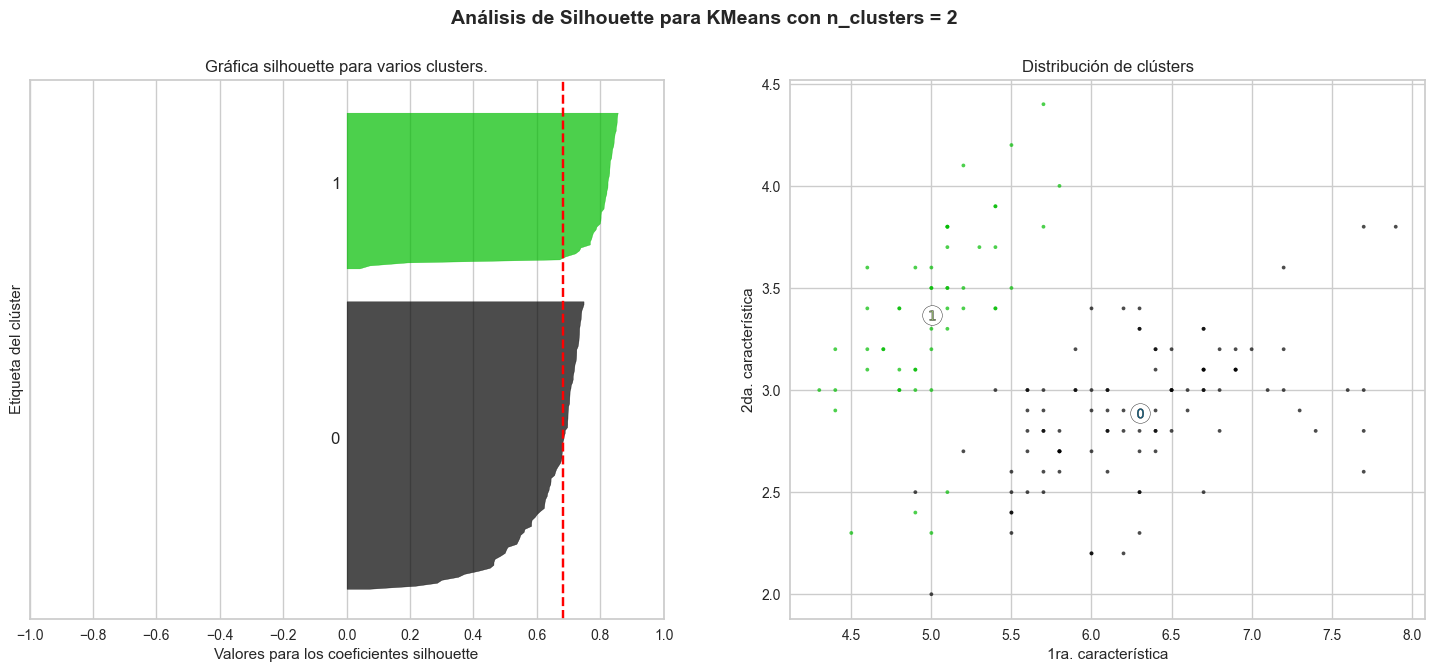

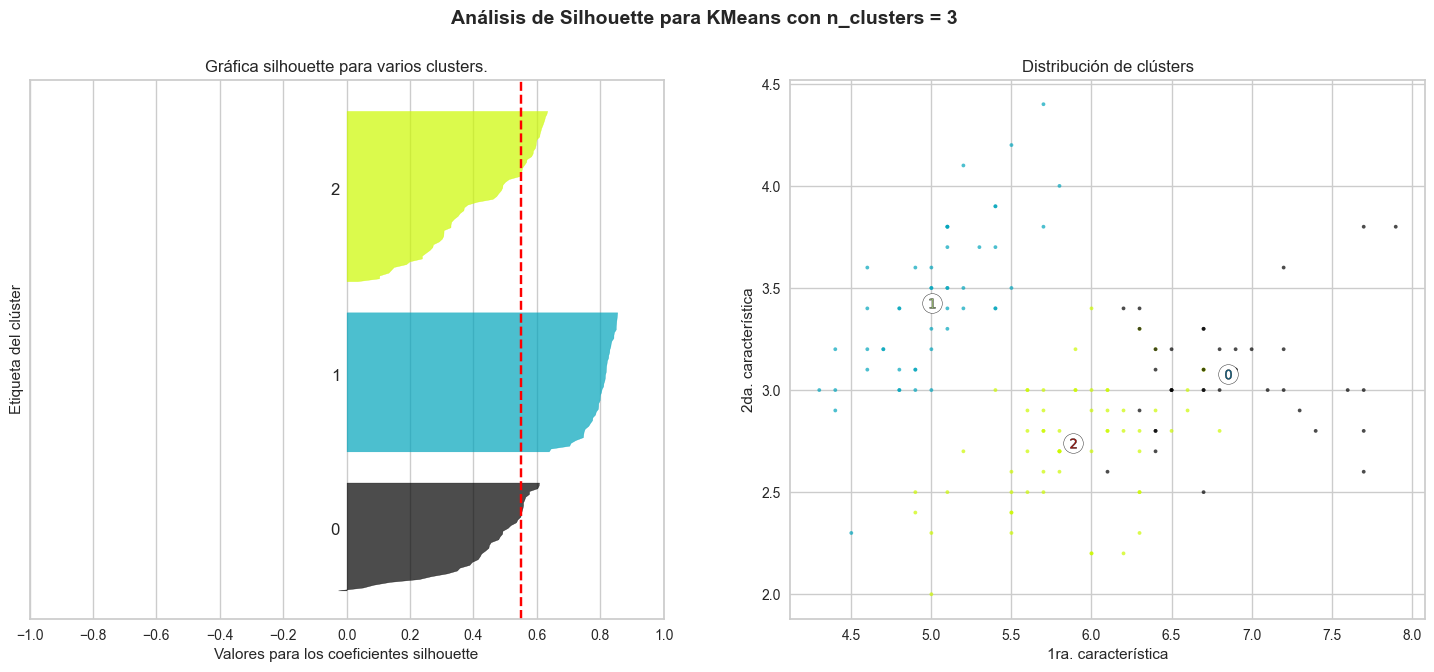

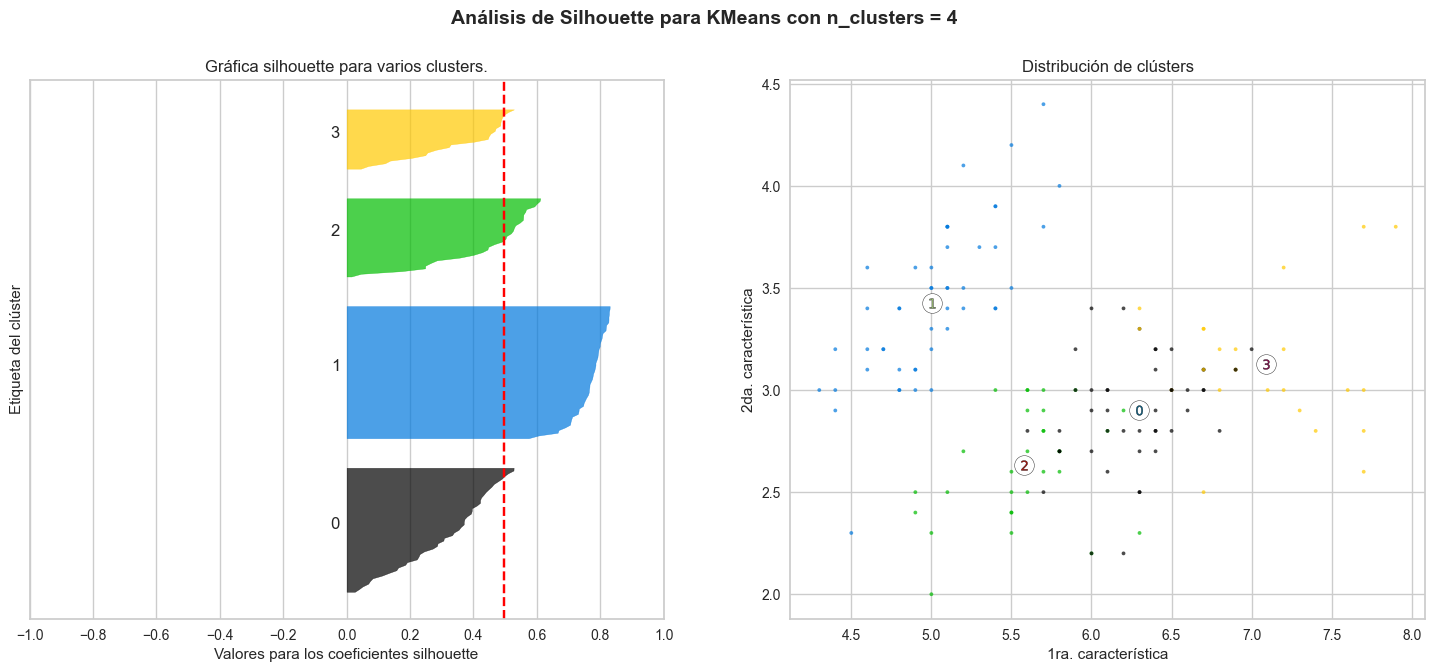

In [70]:
au.plot_silhouette(X_iris, 4)

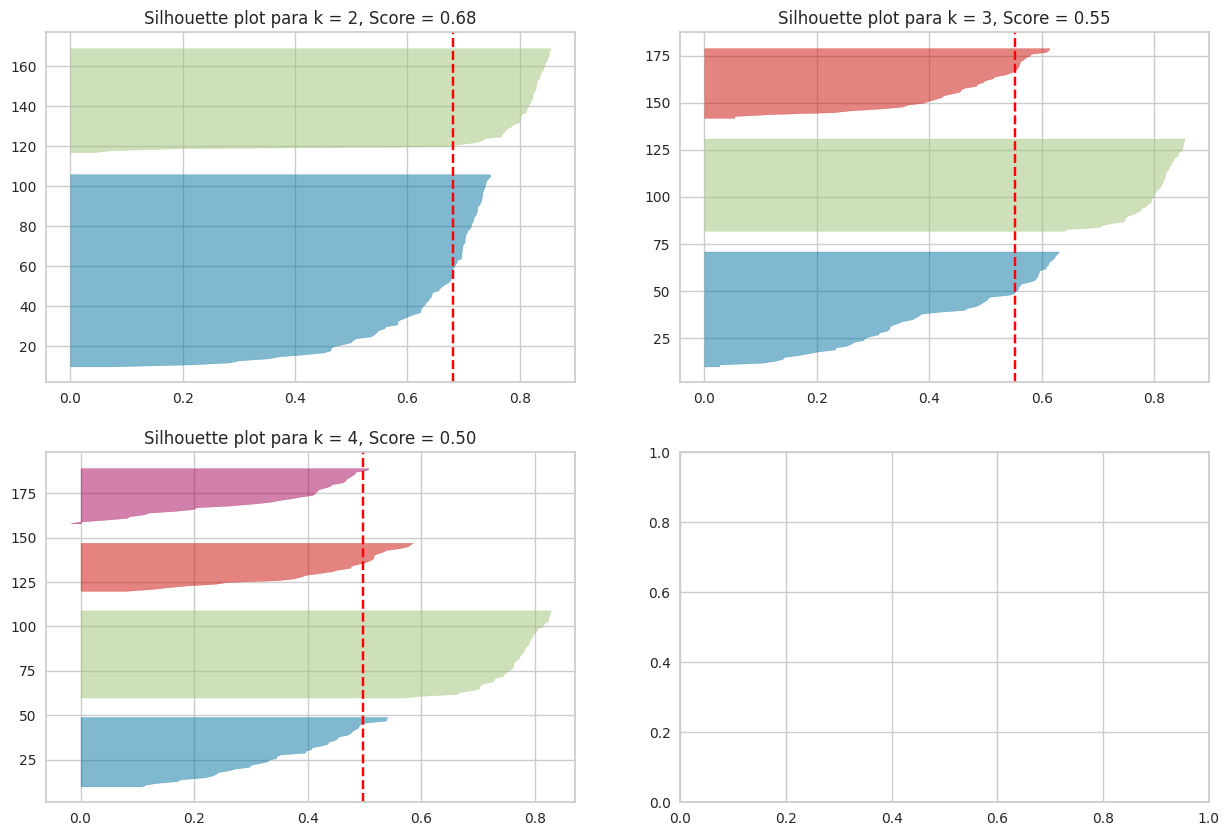

In [71]:
au.silhouette_plot(X_iris, 4)

Text(0, 0.5, 'Anchura del sépalo')

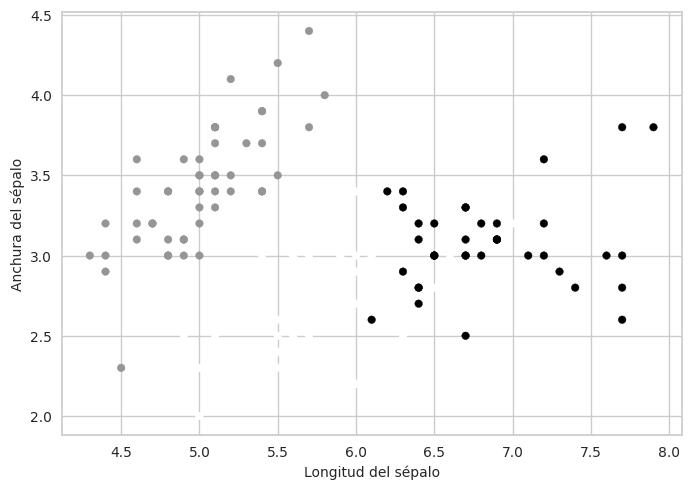

In [72]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = y_kmeans_1, s = 30)
plt.xlabel('Longitud del sépalo', fontsize = 10)
plt.ylabel('Anchura del sépalo', fontsize = 10)

## Clasificación de dígitos con K-Means

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

Cargamos el dataset DIGITS

In [74]:
digits = load_digits()
data = digits.data
print(data.shape)

(1797, 64)


Invertimos los colores para mejor visualización

In [75]:
data = 255-data

Fijamos la semilla para que los resultados obtenidos aquí sean repetibles

In [76]:
np.random.seed(1)

Análisis del índice "Silhouette Score" para ayudar a determinar el valor de K.    
La función devuelve el número de clústers recomendados después de ejecutar el algoritmo K-Means para un conjunto concreto de clusters

In [77]:

print("Número de clústers recomendados : ", au.silhouette(data,12))

Número de clústers recomendados :  9


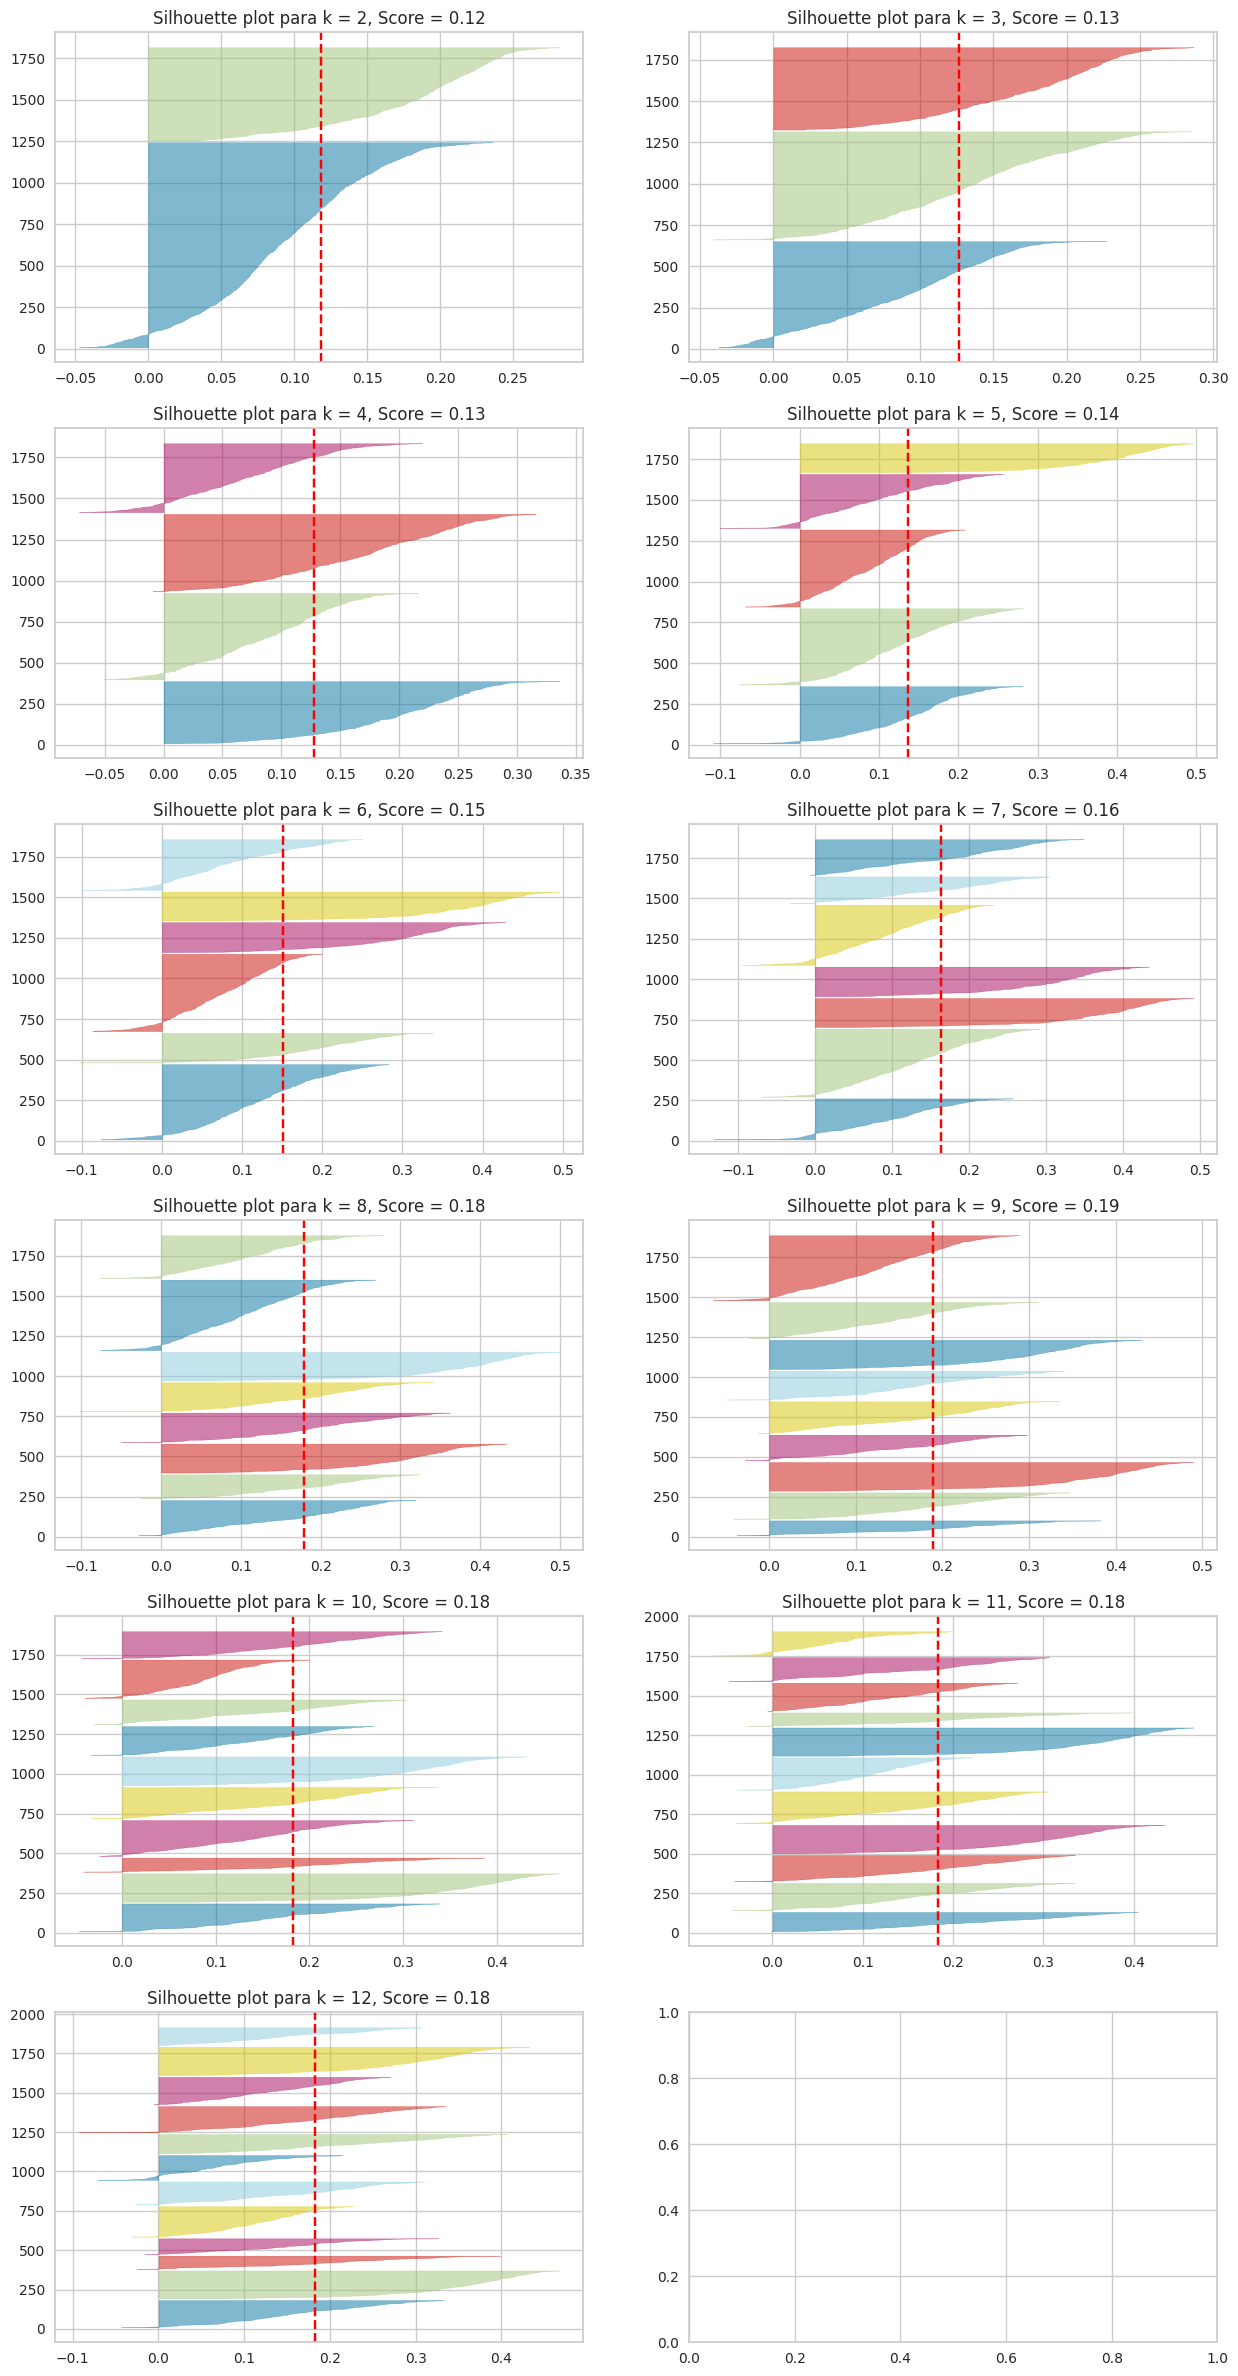

In [78]:


au.silhouette_plot(data,12)

Como tenemos 10 dígitos diferentes (del 0 al 9), vamos a agrupar las imágenes en 10 clústers

In [79]:
n = 10

Ejecutamos el modelo k-means

In [80]:
kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(data)
Z = kmeans.predict(data)

Mostramos los clústers resultantes del agrupamiento

cluster 0
208 elementos


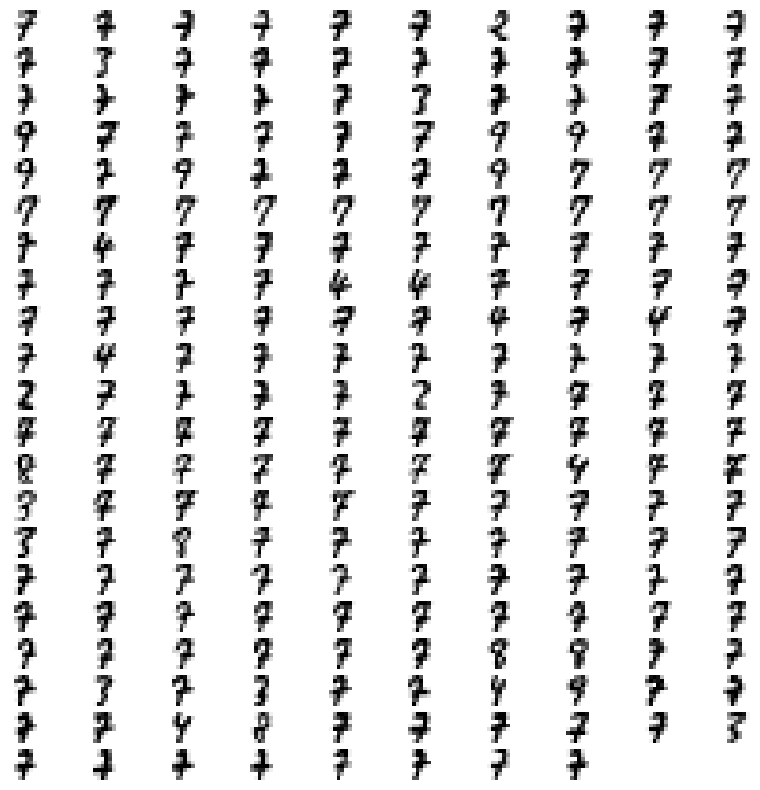

cluster 1
179 elementos


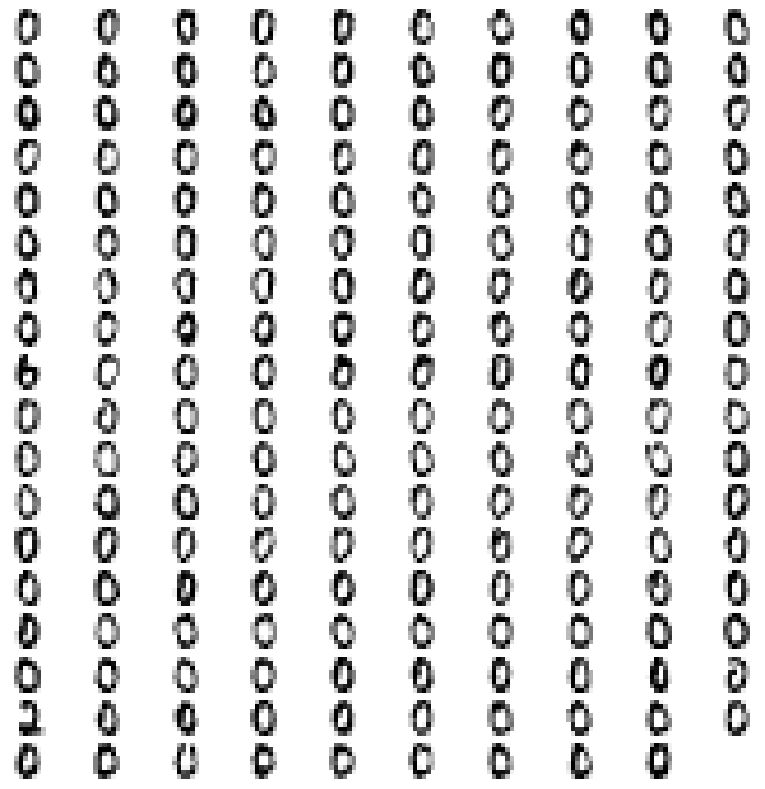

cluster 2
227 elementos


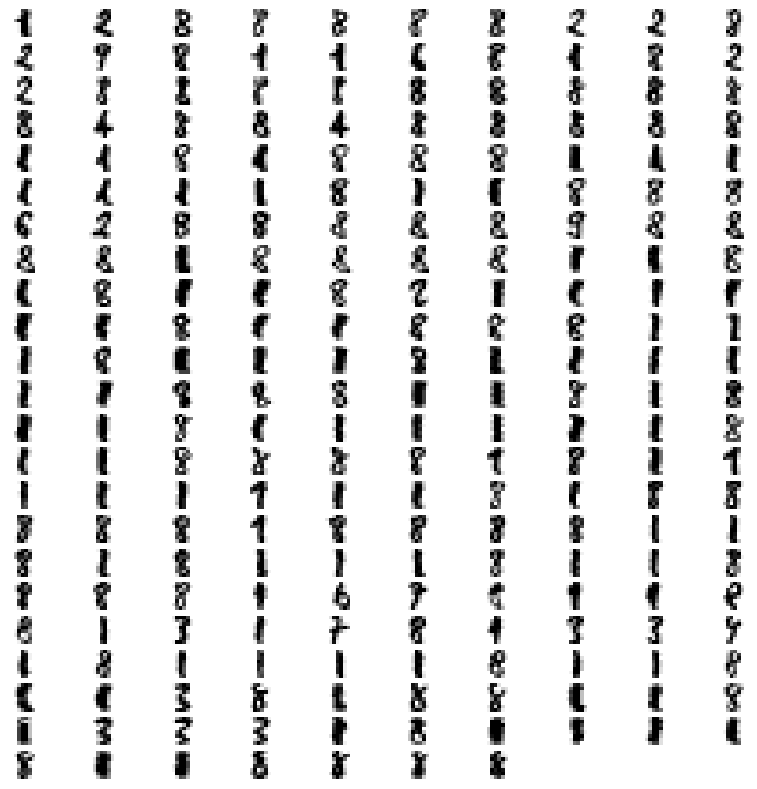

cluster 3
169 elementos


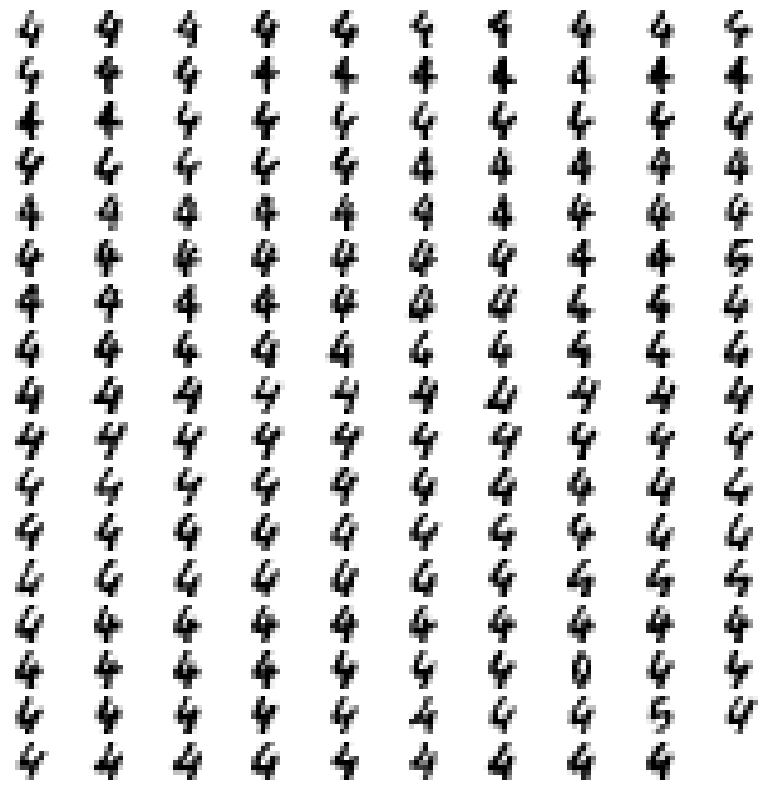

cluster 4
241 elementos


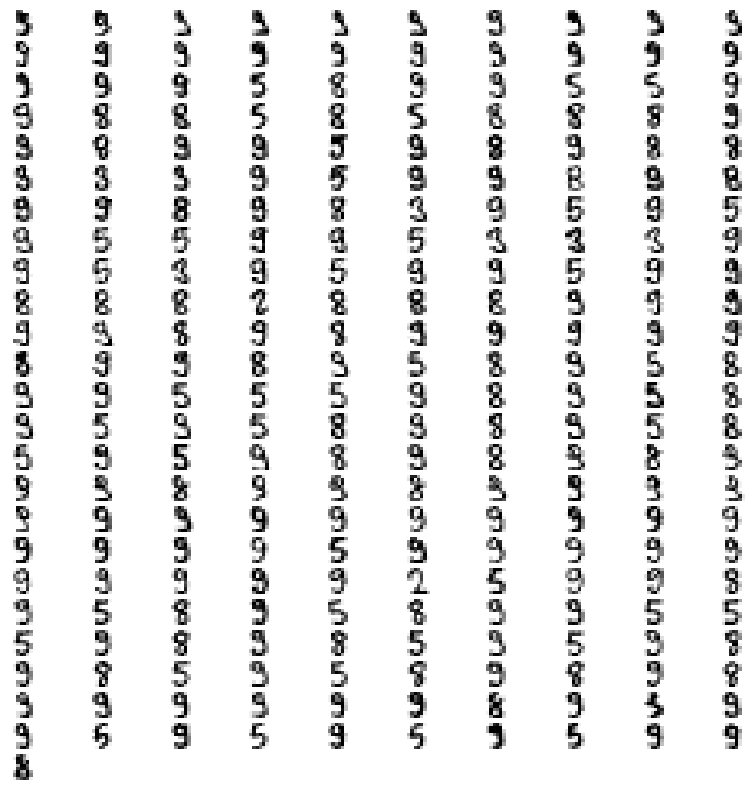

cluster 5
85 elementos


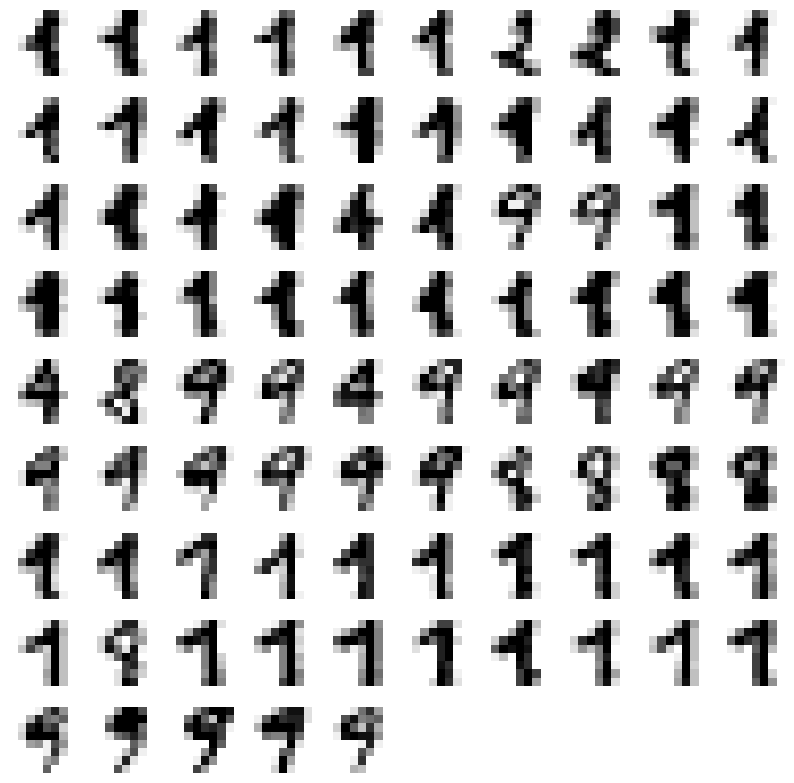

cluster 6
182 elementos


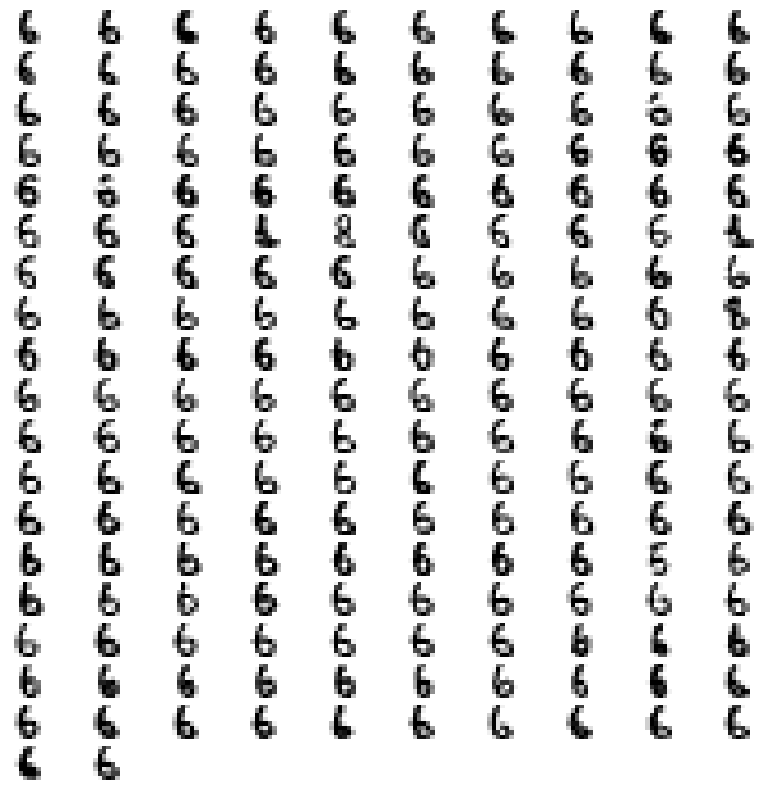

cluster 7
176 elementos


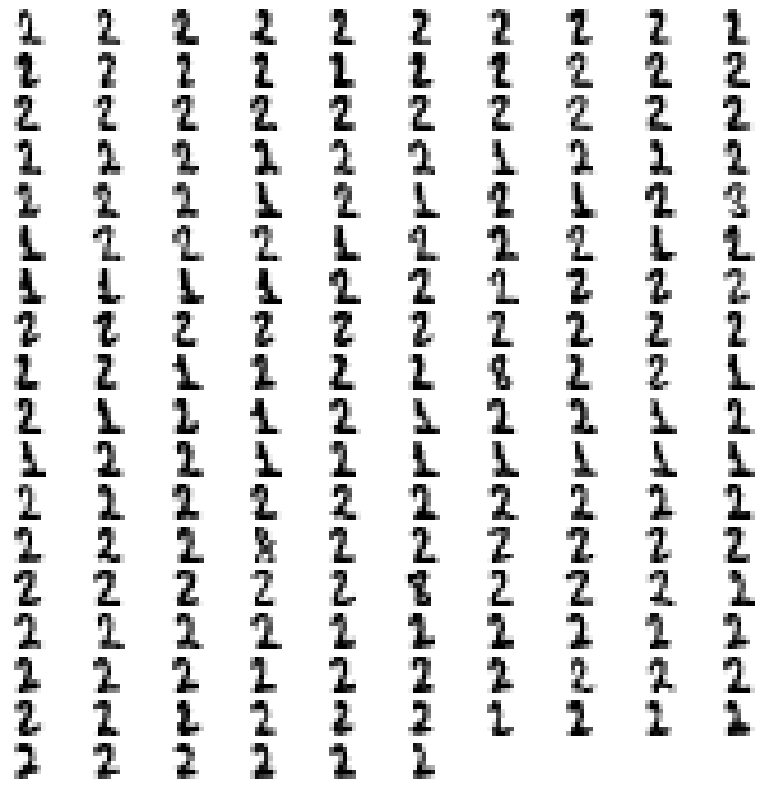

cluster 8
181 elementos


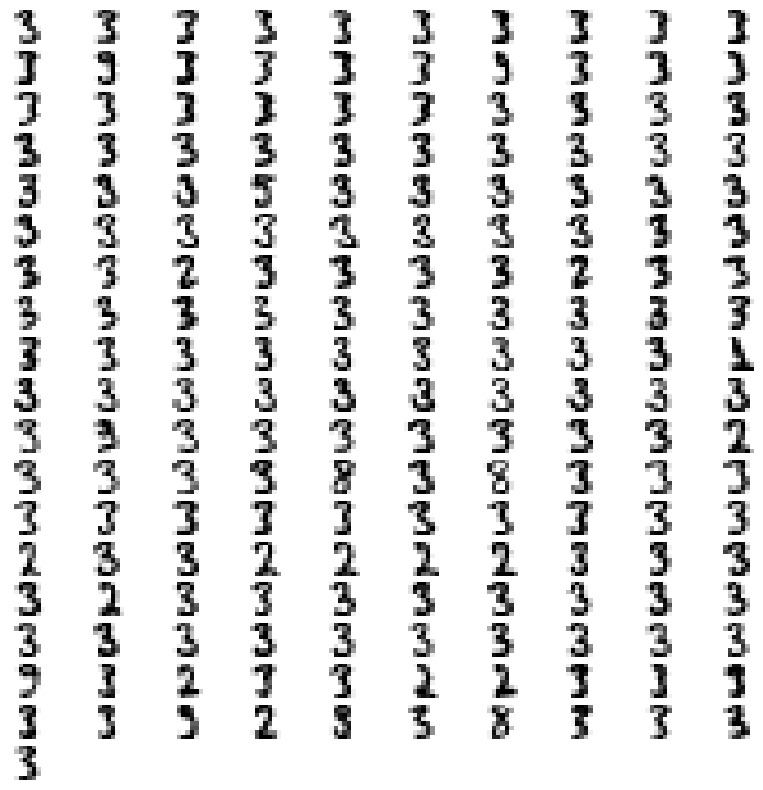

cluster 9
149 elementos


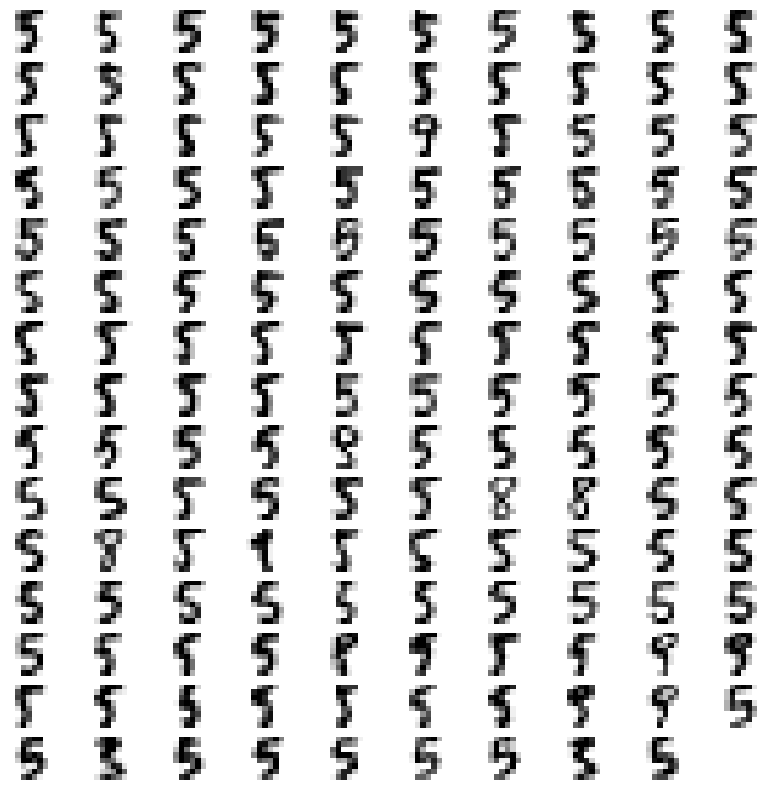

In [81]:
for i in range(0,n): # bucle para mostrar las imagenes de todos los clusters

    fila = np.where(Z==i)[0] # filas en Z donde están las imagenes de cada cluster
    num = fila.shape[0]      # número imagenes de cada cluster
    r = np.floor(num/10.)    # número de filas menos 1 en figura de salida 

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(10,10))                 # tamaño de la figura
    for k in range(0, num):                     # bucle para mostrar las imagenes de cada cluster en una figura
        a = int(r+1)                            # número de filas en figura de salida
        b = int(k+1)                            # número de columnas en figura de salida
        plt.subplot(a, 10, b)
        imagen = data[fila[k], ]                # imagen a mostrar
        imagen = imagen.reshape(8, 8)           # rehacer la imagen a 8x8
        plt.imshow(imagen, cmap=plt.cm.gray)    # mostrar la imagen en escala de grises
        plt.axis('off')
    plt.show()